In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from matplotlib.collections import LineCollection
from sklearn.metrics import RocCurveDisplay
# from pycaret.anomaly import *
from pycaret.classification import *

In [2]:
data = pd.read_csv('ics_raw_set.csv')
attack = data[['time', 'attack']].copy()
col = [col for col in data.columns]
# data = data.drop(['attack'],axis = 1)
print(data.shape)
print(data['time'].unique().shape)
ics_entropy = np.zeros((19633,19))
attack_entropy = np.zeros((19633,2))

(529999, 19)
(19633,)


In [3]:
def calc_entropy(value):
    value,counts = np.unique(value, return_counts=True)
    return entropy(counts,base=2)

def get_entropy(column,i,df):
    temp = df.loc[df['time'] == i]
    return calc_entropy(temp[column])

In [ ]:
def smoothListGaussian(list, degree=5):
    window = degree*2-1
    weight = np.array([1.0]*window)
    weightGauss = []
    for i in range(window):
        i = i-degree+1
        frac = i/float(window)
        gauss = 1/(np.exp((4*(frac))**2))
        weightGauss.append(gauss)
    weight = np.array(weightGauss)*weight
    smoothed = [0.0]*(len(list)-window)
    for i in range(len(smoothed)):
        smoothed[i] = sum(np.array(list[i:i+window])*weight)/sum(weight)
    return smoothed

In [4]:
for i in range(19633):
    ics_entropy[i] = [get_entropy(col,i,data) for col in data.columns]
    
ics_entropy[:,0] = sorted(data['time'].unique())

for i in range(19633):
    temp = get_entropy('attack',i,attack)
    if temp > 0:
        attack_entropy[i] = [i,1]
    else:
        attack_entropy[i] = [i,0]
        
# ics_to_file = pd.DataFrame(ics_entropy)
# ics_to_file.columns = col[0:-1]
# ics_to_file.to_csv('ics_entropy_2.csv', index=False)
# attack_to_file = pd.DataFrame(attack_entropy)
# attack_to_file.columns = ['time','attack']
# attack_to_file.to_csv('ics_attack_2.csv', index=False)

In [5]:
# attack_time = np.asarray(np.where(attack_entropy[:,1] == 1))[0]
# print(attack_time)
scaler = MinMaxScaler(feature_range=(0, 1))
os_entropy[:,1:-1] = scaler.fit_transform(os_entropy[:,1:-1])
smooth_os = np.zeros((627,20))

for i in range(1,20):
    smooth_os[:,i] = smoothListGaussian(os_entropy[:,i])
    
attack_time = np.asarray(np.where(smooth_os[:,-1] > 0))[0]
print(attack_time)
            

[ 1036  1037  1038 ... 18719 18720 18721]


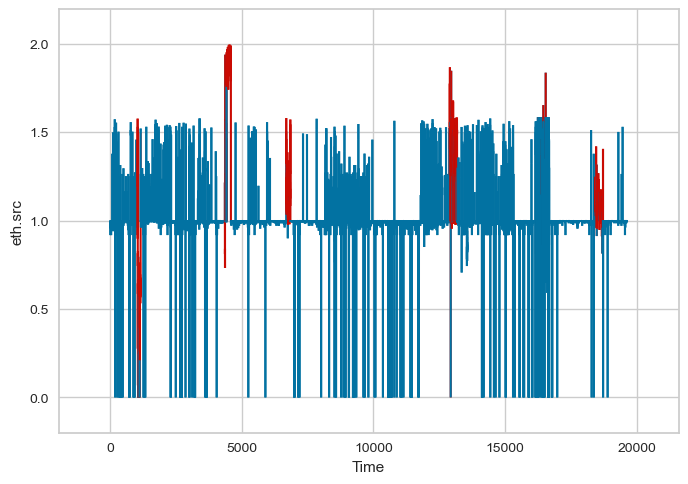

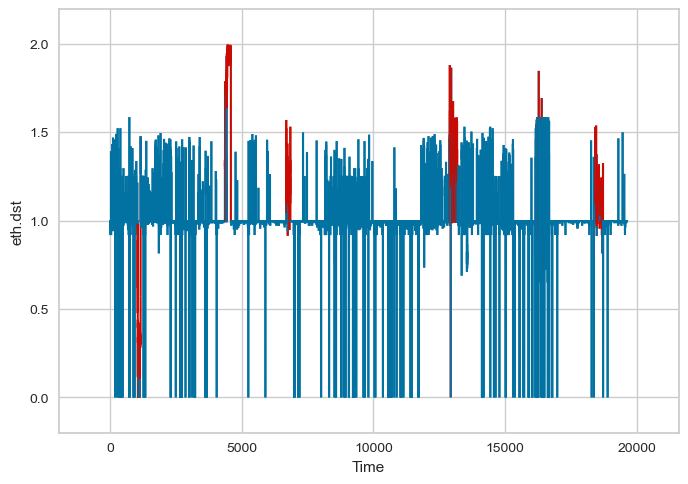

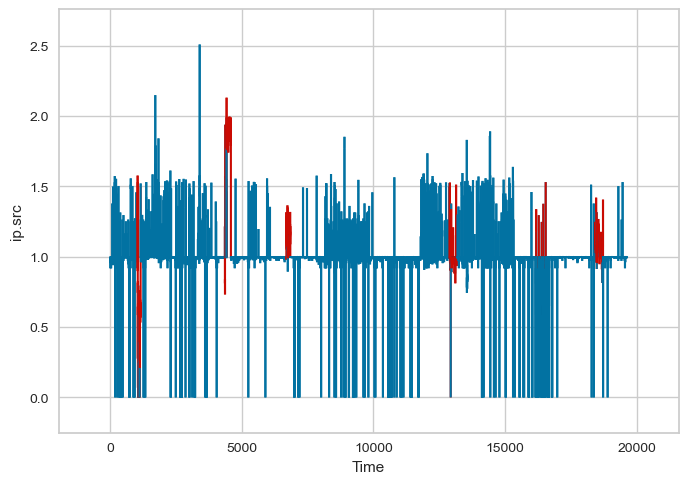

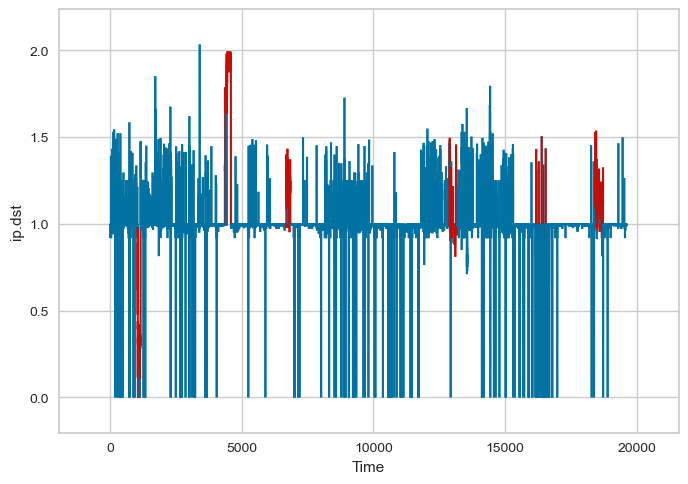

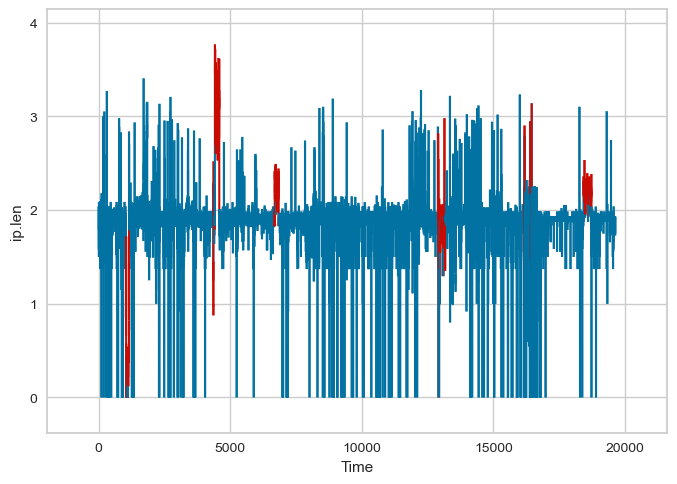

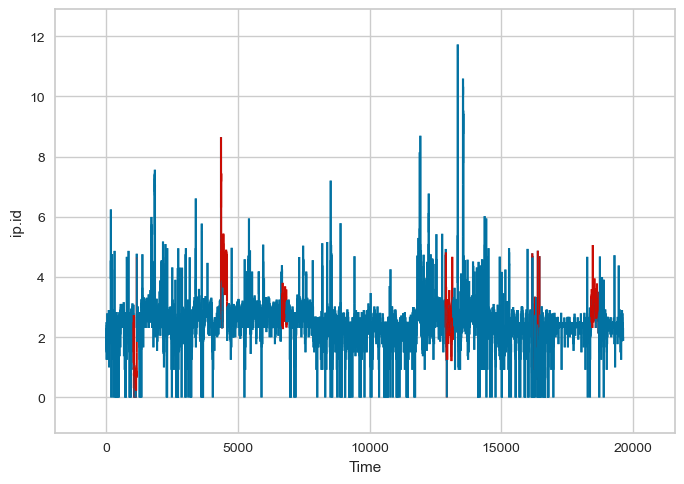

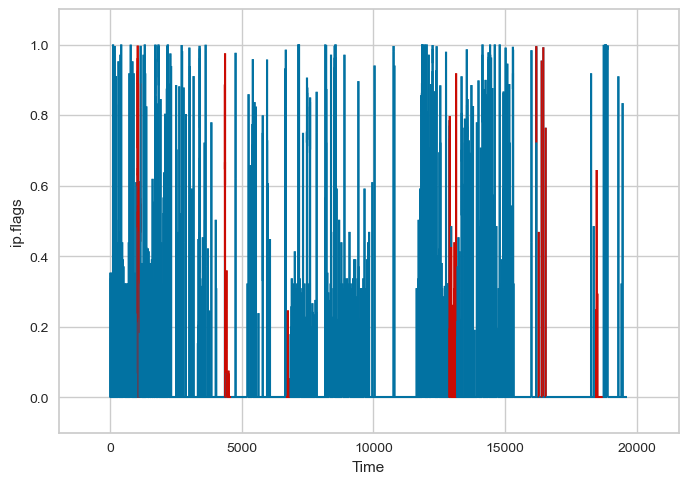

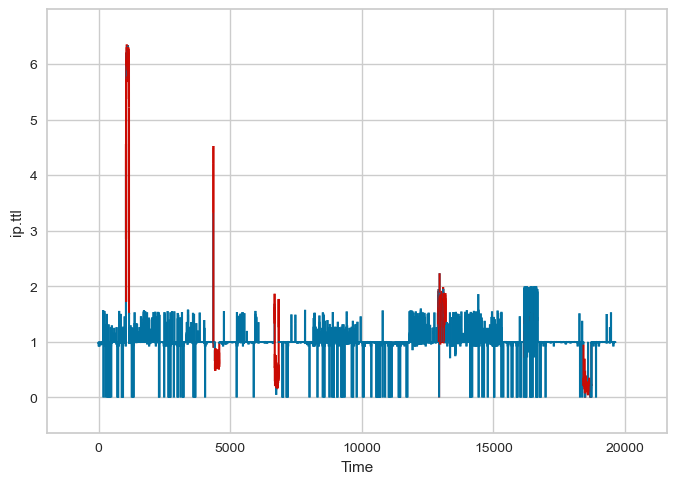

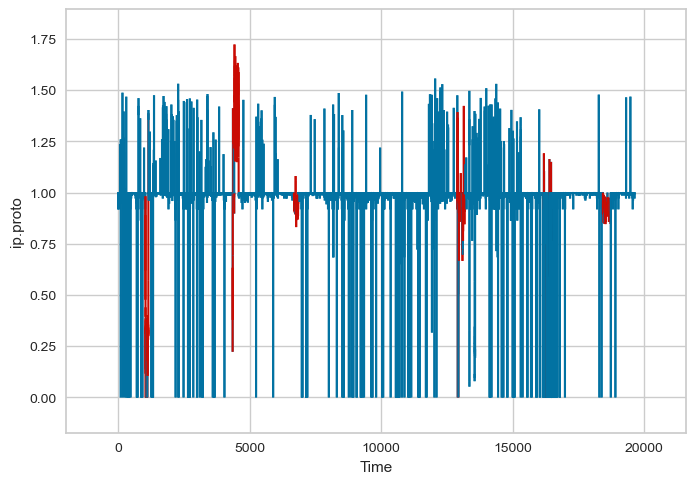

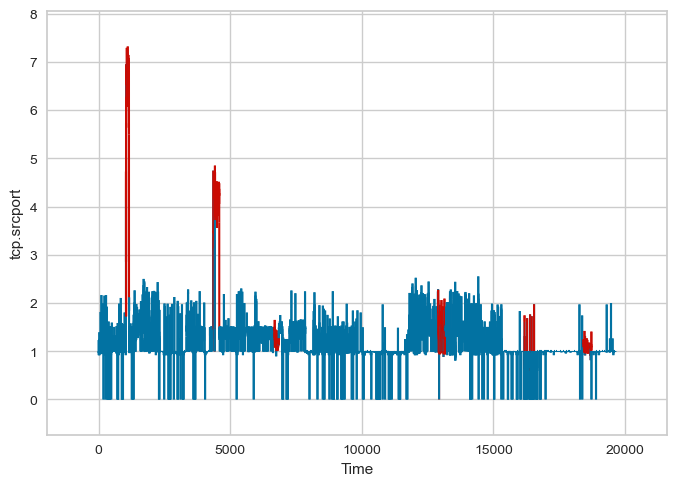

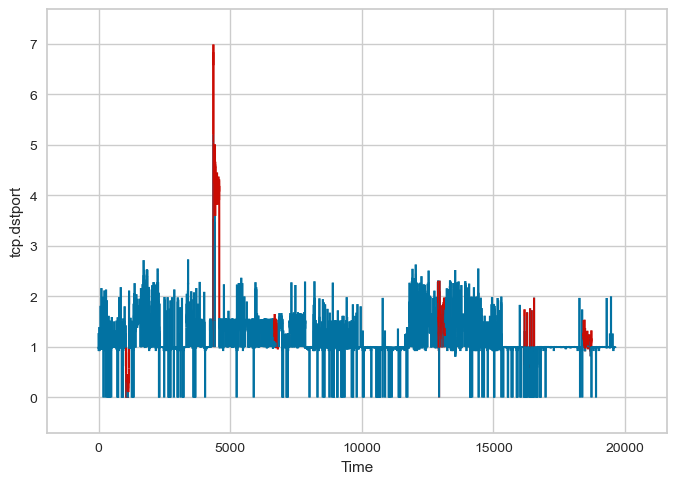

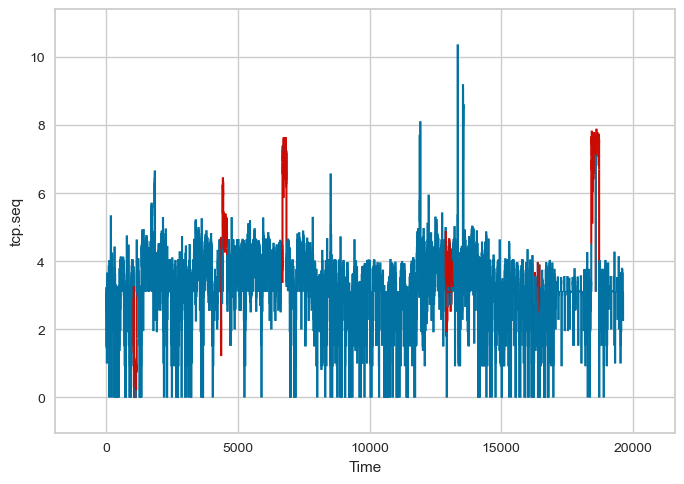

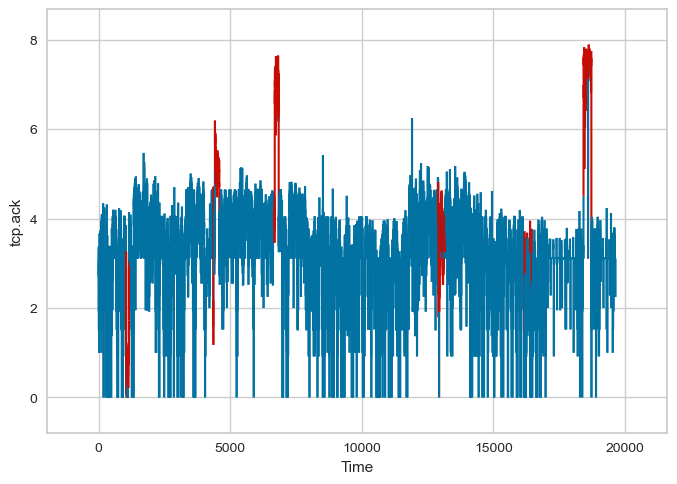

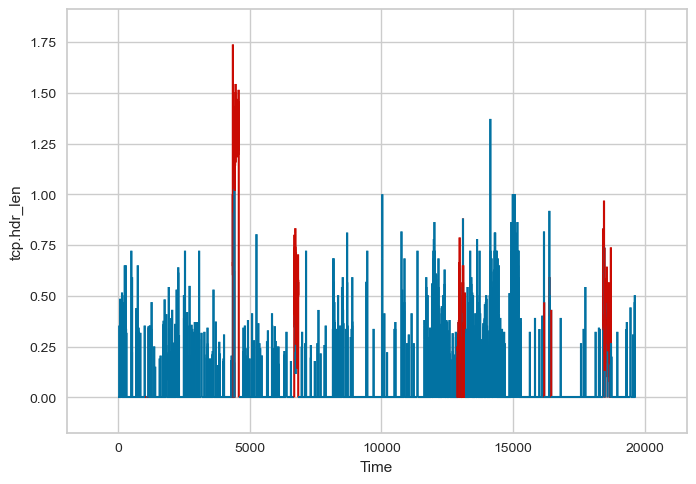

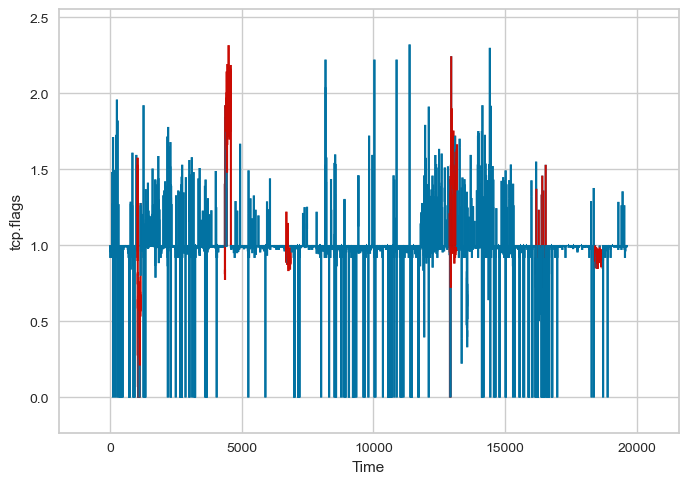

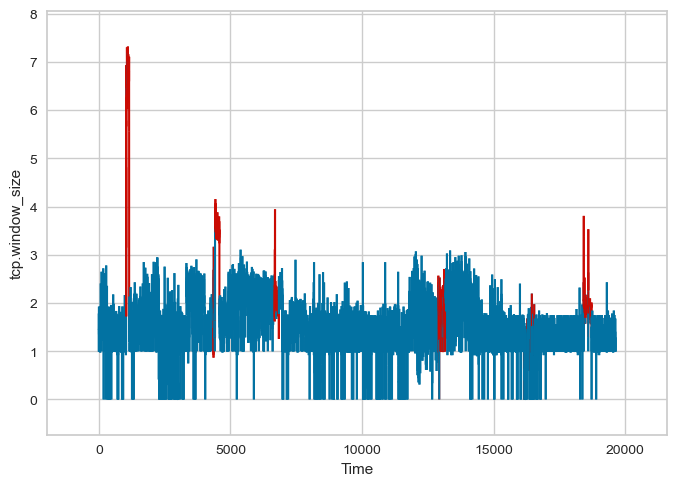

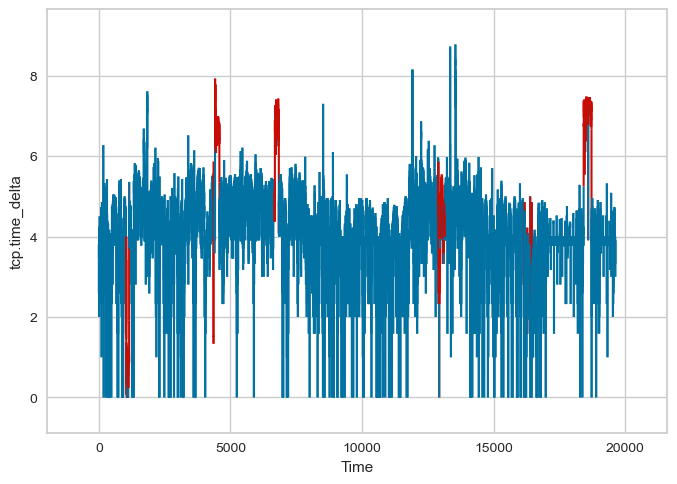

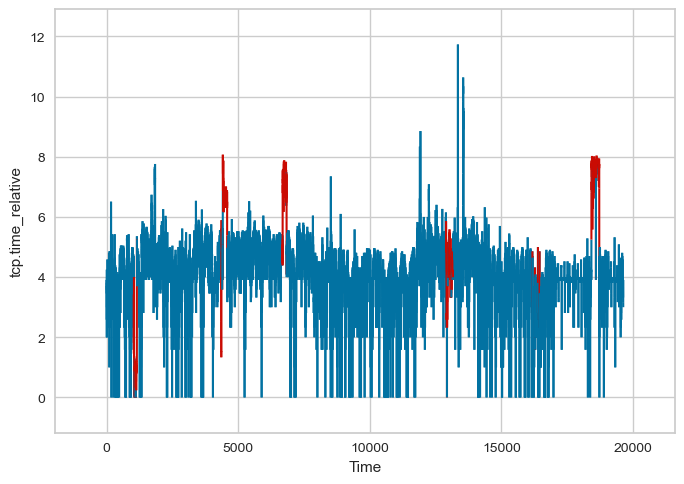

In [6]:
for i in range(1,19):
    x = ics_entropy[:,0]
    y = ics_entropy[:,i]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    cm = dict(zip(range(0,2,1),list("br")))
    colors = list( map( cm.get , np.isin(x,attack_time) ))

    lc = LineCollection(segments, colors=colors, linewidths=1.5)
    fig, ax = plt.subplots()
    ax.add_collection(lc)

    ax.autoscale()
    ax.margins(0.1)
    plt.xlabel('Time')
    plt.ylabel(col[i])
    plt.show()

In [8]:
X = pd.DataFrame(np.concatenate((ics_entropy,np.delete(attack_entropy,0,1)),axis=1))
# X = pd.DataFrame(ics_entropy)
# X.columns = col[0:-1]
X.columns = col
# setup(X,session_id=123)
setup(X,target='attack',fix_imbalance = True,feature_selection=True)

,Description,Value
0,session_id,2703
1,Target,attack
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(19633, 20)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


(None,
 <MLUsecase.CLASSIFICATION: 1>,
 2703,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['time'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='attack',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('fix_perfect', Remove_100(target='attack')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select',
                  Advanced_Feature_Selection_Classic(ml_usecase='classific

In [9]:
# models()
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9988,0.9999,0.9903,0.9864,0.9883,0.9877,0.9877,0.5620
et,Extra Trees Classifier,0.9984,0.9999,0.9779,0.9917,0.9847,0.9839,0.9839,0.1930
lightgbm,Light Gradient Boosting Machine,0.9981,0.9998,0.9820,0.9825,0.9821,0.9811,0.9812,0.1960
gbc,Gradient Boosting Classifier,0.9977,0.9996,0.9834,0.9730,0.9780,0.9768,0.9769,1.5990
dt,Decision Tree Classifier,0.9972,0.9914,0.9848,0.9643,0.9742,0.9727,0.9729,0.0650
knn,K Neighbors Classifier,0.9955,0.9863,0.9696,0.9471,0.9579,0.9555,0.9558,0.0630
ada,Ada Boost Classifier,0.9931,0.9968,0.9642,0.9103,0.9363,0.9327,0.9332,0.3960
qda,Quadratic Discriminant Analysis,0.9820,0.9897,0.9558,0.7648,0.8489,0.8395,0.8458,0.0190
ridge,Ridge Classifier,0.9739,0.0000,0.9296,0.6877,0.7899,0.7763,0.7867,0.0150
lda,Linear Discriminant Analysis,0.9739,0.9903,0.9296,0.6877,0.7899,0.7763,0.7867,0.0300


/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be remove

/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/karnbongkotboonriong/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be remove

In [16]:
lr = create_model('svm')
# plot_model(gbc, plot = 'feature')
plot_model(svm, plot = 'auc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9709,0.0000,0.9178,0.6634,0.7701,0.7550,0.7664
1,0.9680,0.0000,0.9726,0.6283,0.7634,0.7471,0.7677
2,0.9709,0.0000,0.9726,0.6514,0.7802,0.7653,0.7830
3,0.9541,0.0000,0.9583,0.5349,0.6866,0.6640,0.6970
4,0.9694,0.0000,0.9722,0.6364,0.7692,0.7536,0.7731
5,0.9702,0.0000,0.9444,0.6476,0.7684,0.7530,0.7683
6,0.9753,0.0000,0.9306,0.6979,0.7976,0.7847,0.7939
7,0.9629,0.0000,0.9722,0.5882,0.7330,0.7143,0.7405
8,0.9651,0.0000,0.9452,0.6106,0.7419,0.7241,0.7441


TypeError: AUC plot not available for estimators with no predict_proba attribute.

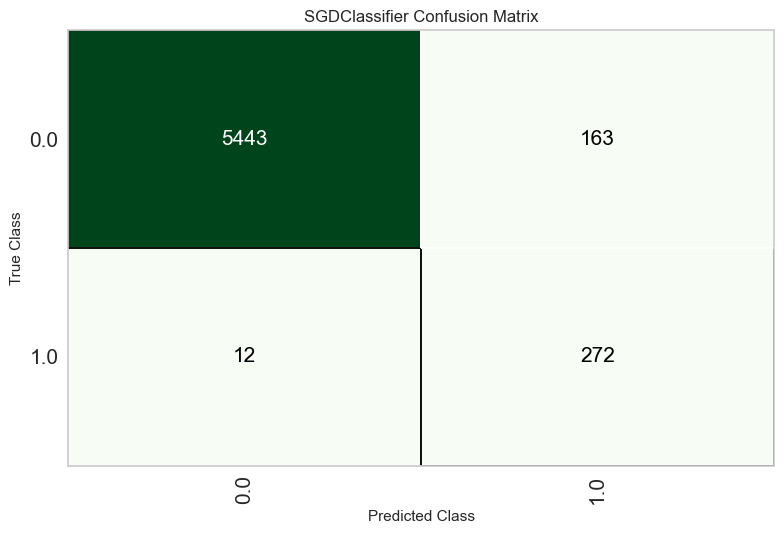

In [17]:
plot_model(svm, plot = 'confusion_matrix')

In [ ]:
histogram = create_model('histogram', fraction = 0.04)
histogram_result = assign_model(histogram)
anomaly = histogram_result['Anomaly']
anomaly.to_csv('anomaly_value.csv', index=False)
pd.DataFrame(attack_entropy[:,1]).to_csv('true_value.csv', index=False)
# plot = RocCurveDisplay.from_predictions(attack_entropy[:,1],anomaly,pos_label=1,name='ROC curve',linewidth=1.5)
# plot.set_xlabel("False Positive Rate")
# plot.set_ylabel("True Positive Rate")
# TP = 0
# FP = 0
# TN = 0
# FN = 0
# for i in range(498):
#     if i not in attack_time and anomaly[i]==0:
#         TN += 1
#     elif i in attack_time and anomaly[i]==1:
#         TP += 1
#     elif i in attack_time and anomaly[i]==0:
#         FN += 1
#     elif i not in attack_time and anomaly[i]==1:
#         FP += 1

# print("True positive =",TP)
# print("False positive =",FP)
# print("True negative =",TN)
# print("False negative =",FN)